# Balanced Case

Inputs balanceados, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito estáveis, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") equilibradas.

## Inputs

In [1]:
%run 1.inputs.ipynb

Edges Inputs salvo em ../datasets/edges_input.csv
Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [2]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [3]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7948     0.1760       0.2456    
10       0.4180     0.9595       0.9591    
20       0.1851     0.9688       0.9677    
30       0.0965     0.9731       0.9720    
40       0.0699     0.9767       0.9759    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [4]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-57    2.6   11     0.36   1        Bom      0.98      
-34    3.1   25     0.35   1        Bom      0.98      
-72    8.5   82     0.41   0        Ruim     1.00      
-78    4.1   92     0.31   0        Ruim     0.99      
-62    3.7   14     0.02   1        Bom      0.99      
-63    3.6   19     0.13   1        Bom      0.98      
-38    1.7   28     0.10   1        Bom      1.00      
-85    4.6   68     0.37   0        Ruim     1.00      
-89    7.9   90     0.57   0        Ruim     1.00      
-68    8.8   96     0.71   0        Ruim     1.00      
-68    5.4   40     0.65   0        Ruim     1.00      
-38    1.6   8      0.19   1        Bom      1.00      
-46    3.1   34     0.00   1        Bom      0.99      
-72    9.2   92     0.31   0        Ruim     1.00      
-70    5.9   29     0.48   0        Ruim     0.98      
-35    1.8   22     0.07   1        Bom      1.0

## Fusion

In [5]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-57    2.6   11     0.36   0.87   0.92   0.85   1        Bom      0.92      
-34    3.1   25     0.35   0.83   0.85   0.89   1        Bom      0.90      
-72    8.5   82     0.41   0.66   0.77   0.49   0        Ruim     0.59      
-78    4.1   92     0.31   0.80   0.85   0.77   0        Ruim     0.51      
-62    3.7   14     0.02   0.70   0.63   0.48   1        Bom      0.78      
-63    3.6   19     0.13   0.94   0.89   0.78   1        Bom      0.93      
-38    1.7   28     0.10   0.68   0.61   0.54   1        Bom      0.77      
-85    4.6   68     0.37   0.94   0.93   0.85   1        Bom      0.55      
-89    7.9   90     0.57   0.64   0.57   0.46   0        Ruim     0.65      
-68    8.8   96     0.71   0.76   0.84   0.72   0        Ruim     0.53      
-68    5.4   40     0.65   0.67   0.75   0.49   0        Ruim     0.59      
-38  

## Kalman

In [6]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-57    2.6   11     0.36   0.87   0.92   0.85   1        Bom      0.92      
-34    3.1   25     0.35   0.83   0.85   0.89   1        Bom      0.90      
-72    8.5   82     0.41   0.66   0.77   0.49   1        Bom      0.65      
-78    4.1   92     0.31   0.80   0.85   0.77   1        Bom      0.60      
-62    3.7   14     0.02   0.70   0.63   0.48   1        Bom      0.65      
-63    3.6   19     0.13   0.94   0.89   0.78   1        Bom      0.70      
-38    1.7   28     0.10   0.68   0.61   0.54   1        Bom      0.72      
-85    4.6   68     0.37   0.94   0.93   0.85   1        Bom      0.69      
-89    7.9   90     0.57   0.64   0.57   0.46   1        Bom      0.64      
-68    8.8   96     0.71   0.76   0.84   0.72   1        Bom      0.62      
-68    5.4   40     0.65   0.67   0.75   0.49   1        Bom      0.59      


## Results

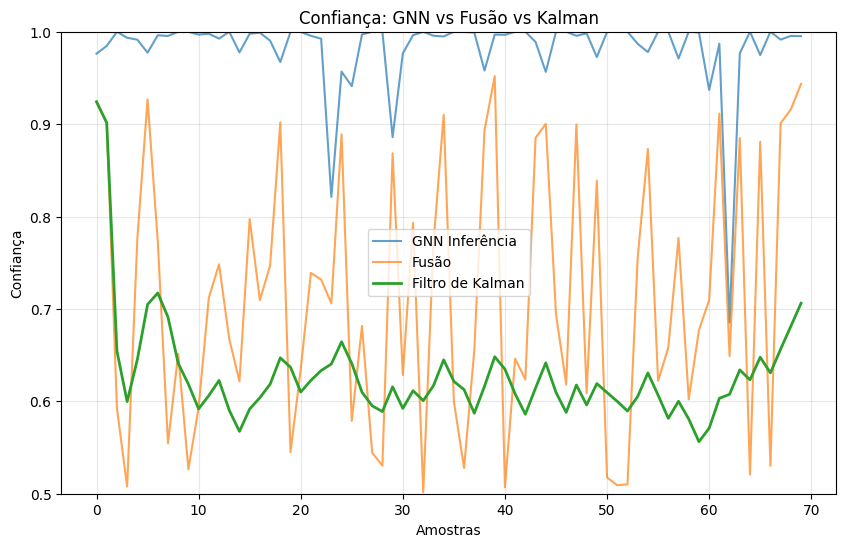

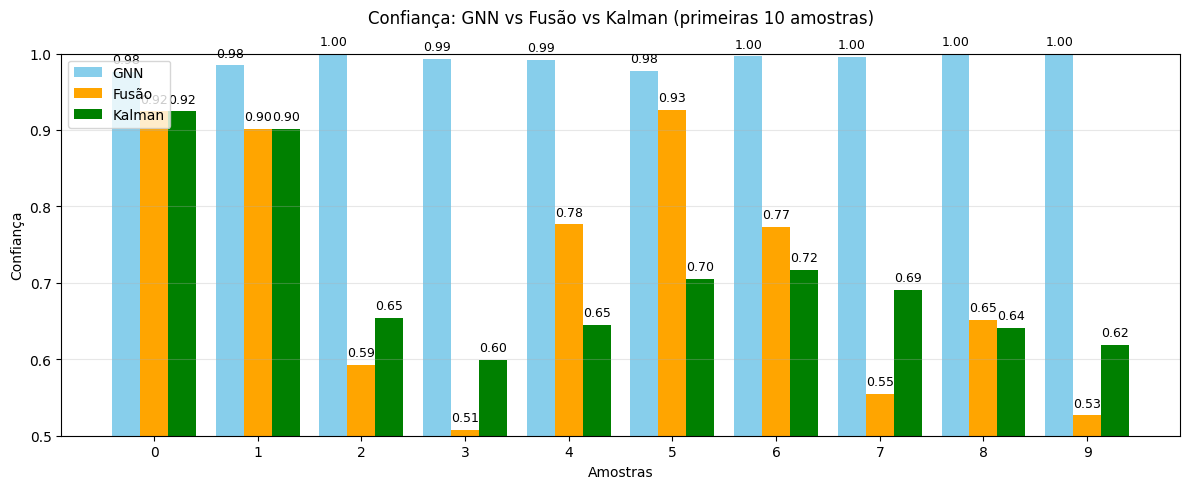

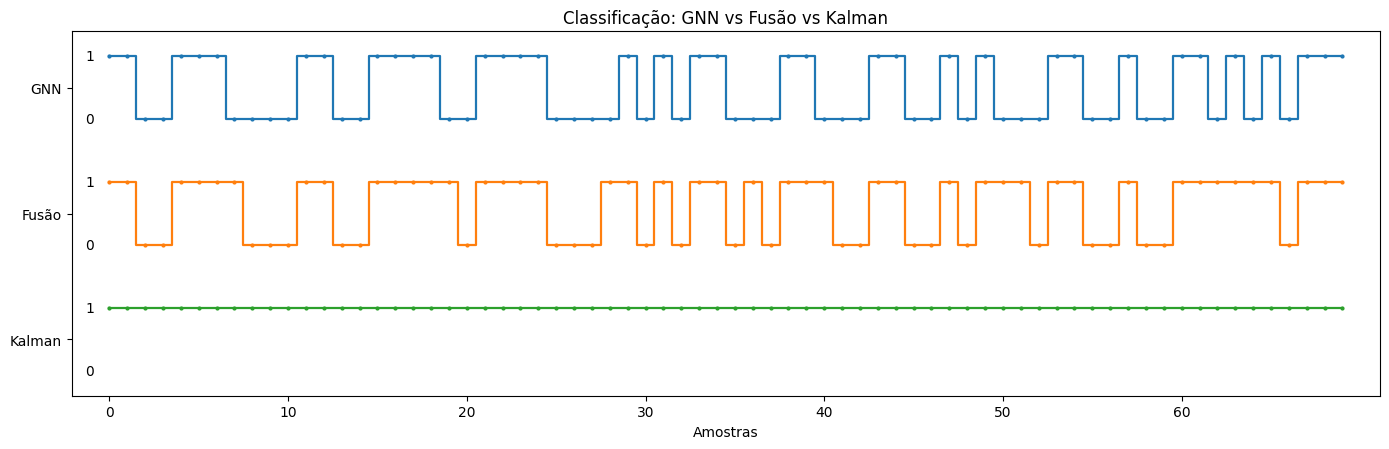

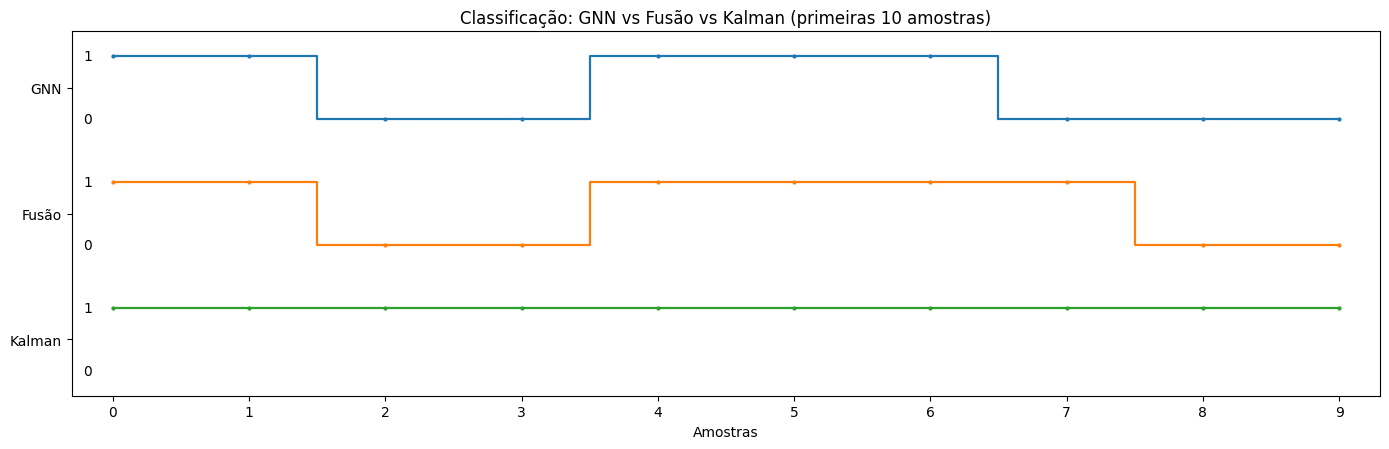

In [7]:
%run 7.results.ipynb

# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [8]:
import os
import pandas as pd
import numpy as np

### Parameters

In [9]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [10]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [11]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [12]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [13]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [14]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [15]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.8333     0.4977       0.4999    
10       0.4713     0.9592       0.9720    
20       0.1932     0.9707       0.9707    
30       0.0924     0.9733       0.9732    
40       0.0662     0.9769       0.9773    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [16]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-78    8.3   97     0.66   0        Ruim     1.00      
-78    7.5   91     0.62   0        Ruim     1.00      
-71    4.1   82     0.96   0        Ruim     1.00      
-87    8.9   61     0.83   0        Ruim     1.00      
-83    9.6   47     0.60   0        Ruim     1.00      
-69    5.7   94     0.56   0        Ruim     1.00      
-81    4.8   63     0.56   0        Ruim     1.00      
-80    7.8   96     0.35   0        Ruim     1.00      
-63    8.1   31     0.80   0        Ruim     1.00      
-90    5.4   41     0.37   0        Ruim     0.99      
-84    9.0   91     0.87   0        Ruim     1.00      
-88    7.4   71     0.87   0        Ruim     1.00      
-74    7.1   65     0.82   0        Ruim     1.00      
-69    9.4   86     0.37   0        Ruim     1.00      
-87    4.7   69     0.52   0        Ruim     1.00      
-66    7.9   42     0.92   0        Ruim     1.0

## Fusion

In [17]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-78    8.3   97     0.66   0.49   0.53   0.53   0        Ruim     0.69      
-78    7.5   91     0.62   0.62   0.60   0.57   0        Ruim     0.64      
-71    4.1   82     0.96   0.63   0.64   0.63   0        Ruim     0.62      
-87    8.9   61     0.83   0.49   0.54   0.62   0        Ruim     0.68      
-83    9.6   47     0.60   0.54   0.52   0.55   0        Ruim     0.68      
-69    5.7   94     0.56   0.51   0.53   0.51   0        Ruim     0.69      
-81    4.8   63     0.56   0.49   0.55   0.56   0        Ruim     0.68      
-80    7.8   96     0.35   0.52   0.51   0.57   0        Ruim     0.69      
-63    8.1   31     0.80   0.65   0.68   0.55   0        Ruim     0.61      
-90    5.4   41     0.37   0.61   0.64   0.48   0        Ruim     0.64      
-84    9.0   91     0.87   0.57   0.59   0.55   0        Ruim     0.66      
-88  

## Kalman

In [18]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-78    8.3   97     0.66   0.49   0.53   0.53   0        Ruim     0.69      
-78    7.5   91     0.62   0.62   0.60   0.57   0        Ruim     0.64      
-71    4.1   82     0.96   0.63   0.64   0.63   0        Ruim     0.63      
-87    8.9   61     0.83   0.49   0.54   0.62   0        Ruim     0.65      
-83    9.6   47     0.60   0.54   0.52   0.55   0        Ruim     0.66      
-69    5.7   94     0.56   0.51   0.53   0.51   0        Ruim     0.66      
-81    4.8   63     0.56   0.49   0.55   0.56   0        Ruim     0.67      
-80    7.8   96     0.35   0.52   0.51   0.57   0        Ruim     0.67      
-63    8.1   31     0.80   0.65   0.68   0.55   0        Ruim     0.66      
-90    5.4   41     0.37   0.61   0.64   0.48   0        Ruim     0.66      
-84    9.0   91     0.87   0.57   0.59   0.55   0        Ruim     0.66      


## Results

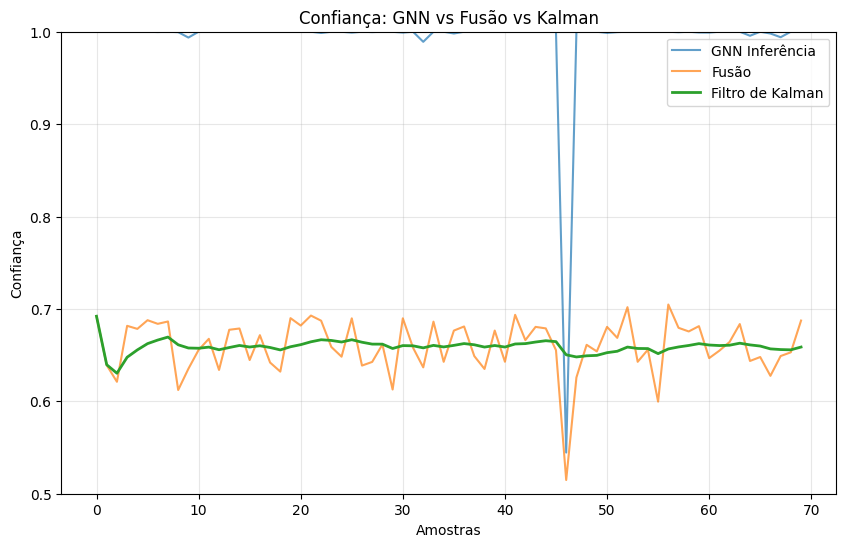

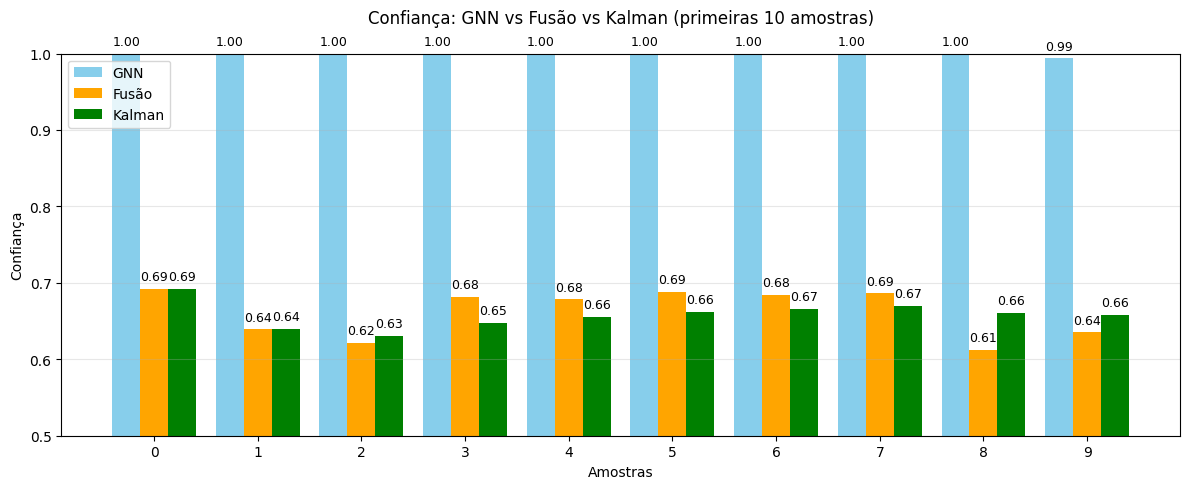

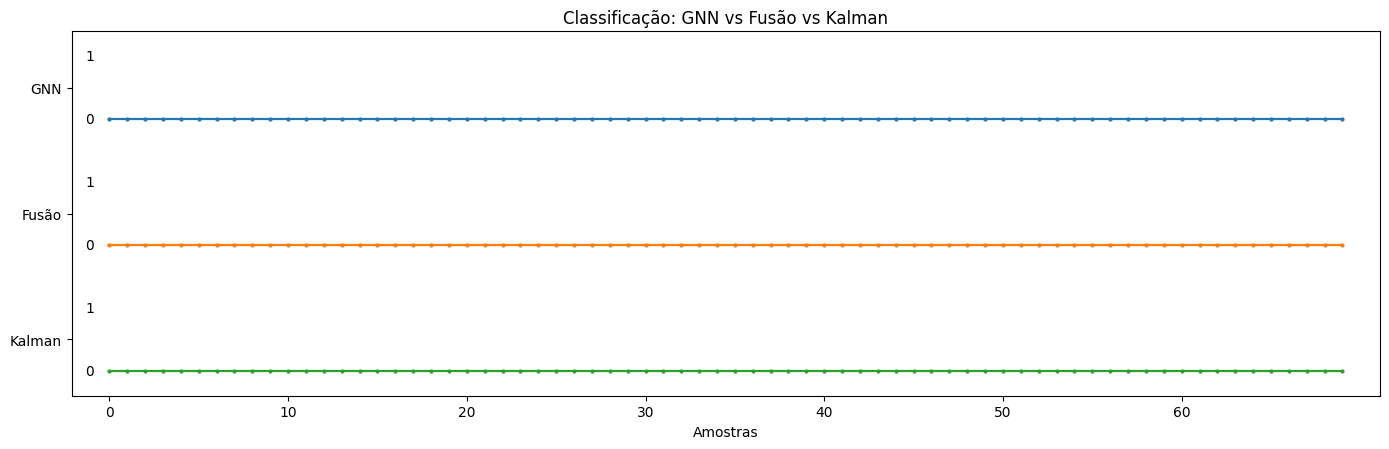

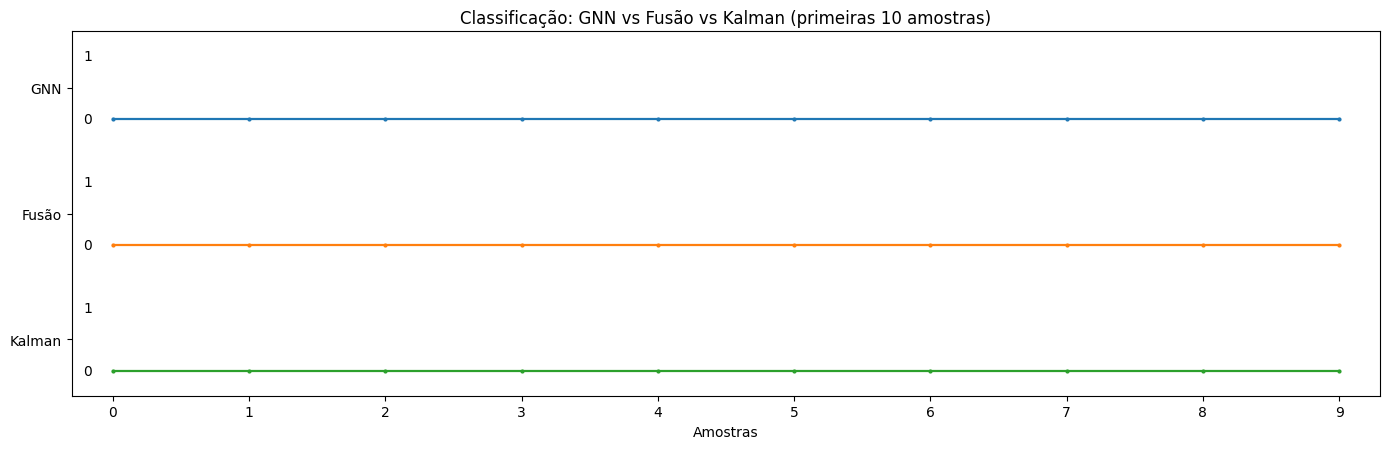

In [19]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Inputs

### Imports

In [20]:
import os
import pandas as pd
import numpy as np

### Parameters

In [21]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [22]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [23]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [24]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [25]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [26]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [27]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7983     0.2924       0.3418    
10       0.4208     0.9479       0.9535    
20       0.1799     0.9656       0.9671    
30       0.0926     0.9711       0.9722    
40       0.0673     0.9763       0.9774    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [28]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-53    3.4   5      0.01   1        Bom      1.00      
-48    1.7   24     0.20   1        Bom      1.00      
-45    1.9   8      0.30   1        Bom      1.00      
-33    1.7   12     0.26   1        Bom      1.00      
-52    3.3   27     0.31   1        Bom      0.96      
-42    2.0   11     0.13   1        Bom      1.00      
-30    1.4   20     0.30   1        Bom      1.00      
-34    1.7   11     0.37   1        Bom      0.99      
-33    1.4   3      0.09   1        Bom      1.00      
-39    1.1   7      0.12   1        Bom      1.00      
-33    1.9   40     0.26   1        Bom      0.99      
-33    1.1   10     0.06   1        Bom      1.00      
-53    2.3   8      0.11   1        Bom      1.00      
-48    3.4   13     0.00   1        Bom      1.00      
-31    2.4   16     0.16   1        Bom      1.00      
-54    1.8   34     0.03   1        Bom      1.0

## Fusion

In [29]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-53    3.4   5      0.01   0.78   0.92   0.77   1        Bom      0.90      
-48    1.7   24     0.20   0.95   0.92   0.78   1        Bom      0.94      
-45    1.9   8      0.30   0.83   0.84   0.74   1        Bom      0.89      
-33    1.7   12     0.26   0.86   0.90   0.88   1        Bom      0.93      
-52    3.3   27     0.31   0.91   0.87   0.82   1        Bom      0.91      
-42    2.0   11     0.13   0.75   0.91   0.80   1        Bom      0.89      
-30    1.4   20     0.30   0.81   0.90   0.76   1        Bom      0.90      
-34    1.7   11     0.37   0.85   0.93   0.90   1        Bom      0.93      
-33    1.4   3      0.09   0.90   0.87   0.87   1        Bom      0.93      
-39    1.1   7      0.12   0.88   0.92   0.82   1        Bom      0.93      
-33    1.9   40     0.26   0.89   0.85   0.86   1        Bom      0.92      
-33  

## Kalman

In [30]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-53    3.4   5      0.01   0.78   0.92   0.77   1        Bom      0.90      
-48    1.7   24     0.20   0.95   0.92   0.78   1        Bom      0.94      
-45    1.9   8      0.30   0.83   0.84   0.74   1        Bom      0.92      
-33    1.7   12     0.26   0.86   0.90   0.88   1        Bom      0.92      
-52    3.3   27     0.31   0.91   0.87   0.82   1        Bom      0.92      
-42    2.0   11     0.13   0.75   0.91   0.80   1        Bom      0.91      
-30    1.4   20     0.30   0.81   0.90   0.76   1        Bom      0.91      
-34    1.7   11     0.37   0.85   0.93   0.90   1        Bom      0.91      
-33    1.4   3      0.09   0.90   0.87   0.87   1        Bom      0.92      
-39    1.1   7      0.12   0.88   0.92   0.82   1        Bom      0.92      
-33    1.9   40     0.26   0.89   0.85   0.86   1        Bom      0.92      


## Resuts

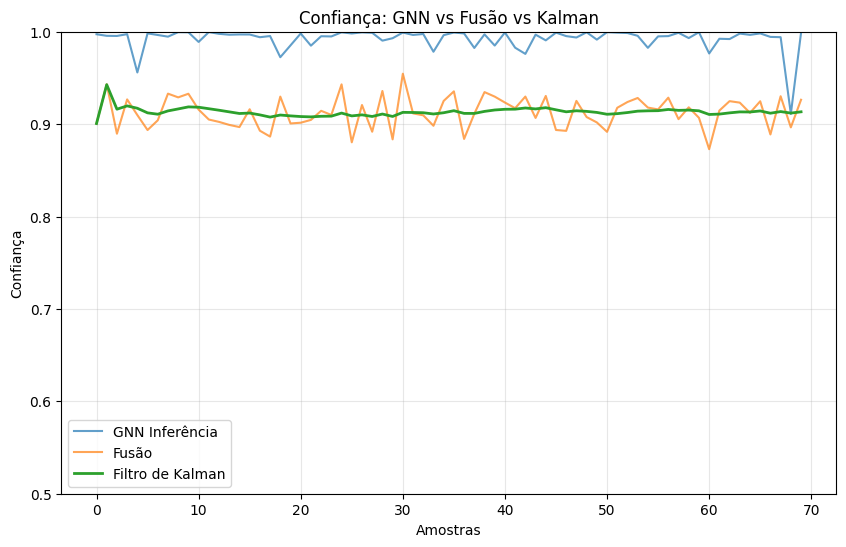

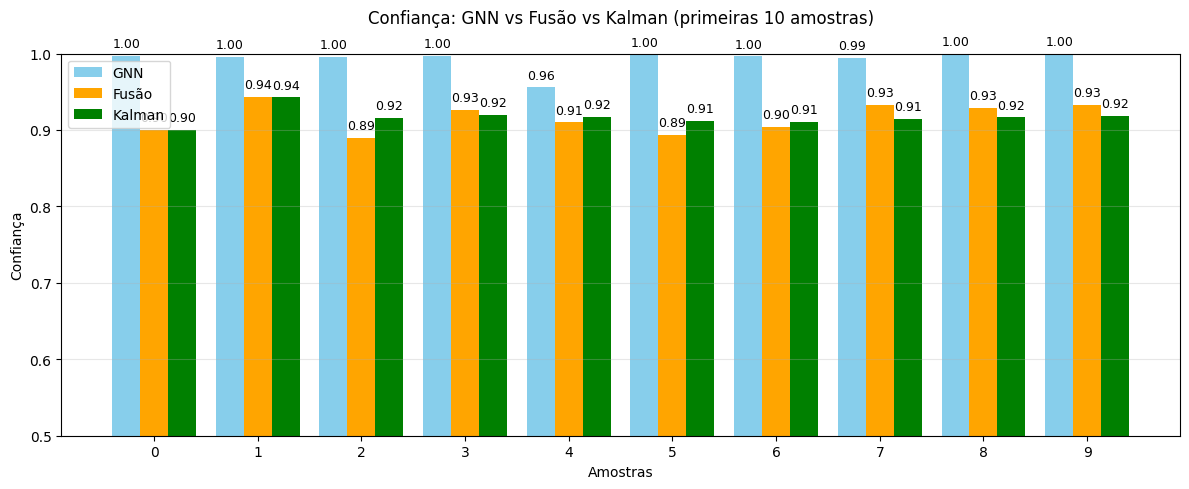

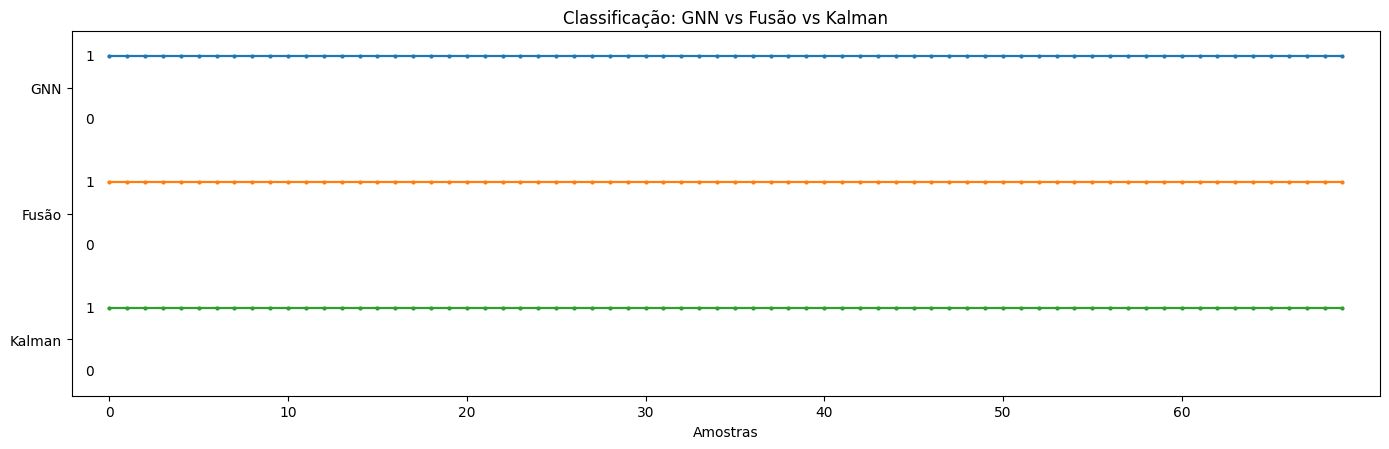

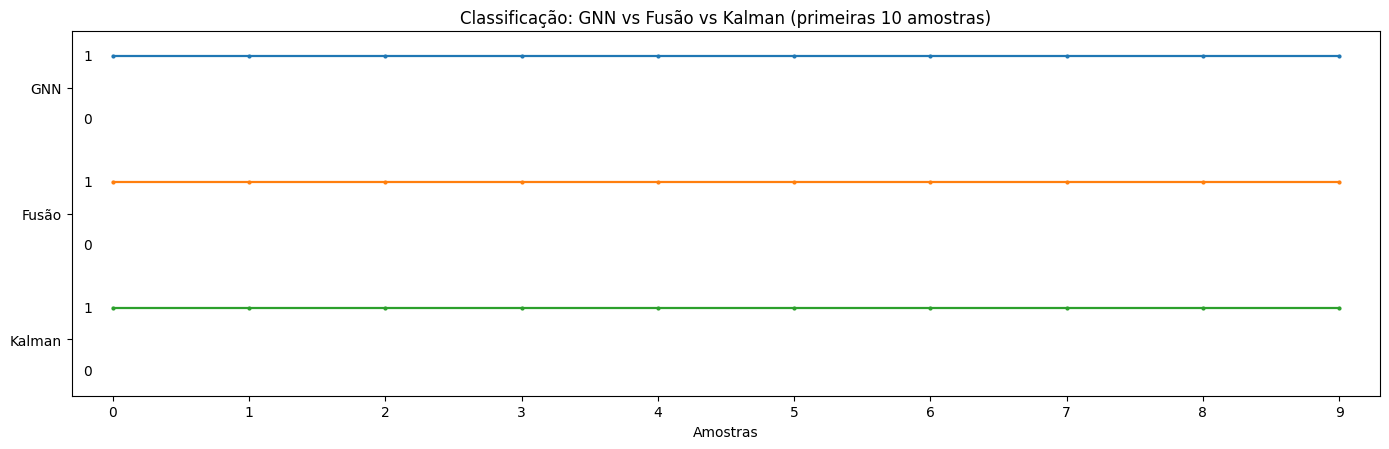

In [31]:
%run 7.results.ipynb